In [83]:
import os
import pandas as pd
import numpy as np
import json
import ast

In [84]:
temp = "[0, 1, 2]"
temp = ast.literal_eval(temp)
type(temp)

list

In [85]:
results_path = 'models/ddpm/hypers/0.0025'
folders = sorted(os.listdir(results_path))

results = pd.DataFrame(columns=['IMG_SIZE',
 'BATCH_SIZE',
 'LEARNING_RATE',
 'NUM_EPOCHS',
 'NUM_GENERATE_IMAGES',
 'NUM_TIMESTEPS',
 'MIXED_PRECISION',
 'GRADIENT_ACCUMULATION_STEPS',
 'losses',
 'fid_scores',
 'fid_scores_epochs',
 'dataset',
 'UNET_size',
 'optimizer',
 'seed',
 'exited_loss_na',
 'execution_time'])

# get metadata.json from each folder
for folder in folders:
    metadata_path = os.path.join(results_path, folder, 'metadata.json')
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)
    
    metadata['losses'] = str(metadata['losses'])
    metadata['fid_scores'] = str(metadata['fid_scores'])
    metadata['fid_scores_epochs'] = str(metadata['fid_scores_epochs'])

    results = pd.concat([results, pd.DataFrame(metadata, index=[0])], ignore_index=True)
results.head()

C:\Users\adamm\AppData\Local\Temp\ipykernel_28032\255260940.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame(metadata, index=[0])], ignore_index=True)


,IMG_SIZE,BATCH_SIZE,LEARNING_RATE,NUM_EPOCHS,NUM_GENERATE_IMAGES,NUM_TIMESTEPS,MIXED_PRECISION,GRADIENT_ACCUMULATION_STEPS,losses,fid_scores,fid_scores_epochs,dataset,UNET_size,optimizer,seed,exited_loss_na,execution_time
0,96,16,0.00001,35,9,500,fp16,1,"[1.1774862110614777, 1.0176522086064022, 0.765...","[321.73444818864544, 300.4899763711119, 275.96...","[0, 10, 20, 30, 34]",square96_random0.0025,big,Adam,0,False,2233.623996
1,96,16,0.00001,35,9,500,fp16,1,"[1.1789524853229523, 1.017277967184782, 0.7649...","[326.84674433309567, 290.5935336576049, 256.09...","[0, 10, 20, 30, 34]",square96_random0.0025,big,Adam,1,False,2240.804714
2,96,16,0.00001,35,9,500,fp16,1,"[1.1785640964905422, 1.018510840833187, 0.7674...","[325.661124946291, 293.20694522449094, 252.497...","[0, 10, 20, 30, 34]",square96_random0.0025,big,Adam,2,False,2240.856870
3,96,16,0.00001,35,9,500,fp16,1,"[1.178771900633971, 1.0184324271976948, 0.7668...","[324.7122726505821, 286.7539453833973, 250.920...","[0, 10, 20, 30, 34]",square96_random0.0025,big,Adam,3,False,2241.236400
4,96,16,0.00001,35,9,500,fp16,1,"[1.1780003954966862, 1.0174272085229557, 0.766...","[326.31338600251524, 284.38310313636873, 249.8...","[0, 10, 20, 30, 34]",square96_random0.0025,big,Adam,4,False,2247.025025


In [86]:
results['last_fid'] = results['fid_scores'].apply(lambda x: ast.literal_eval(x)[-1])

In [87]:
results['LEARNING_RATE'].value_counts()

LEARNING_RATE
0.00001    30
0.00010    30
0.00100    30
Name: count, dtype: int64

In [88]:
results.groupby(['LEARNING_RATE', 'optimizer', 'UNET_size']).agg({'last_fid': 'mean', }).sort_values(by='last_fid', ascending=True)

last_fid
LEARNING_RATE optimizer UNET_size            
0.00010       Adam      mid        208.612264
                        big        210.243126
                        small      216.659958
0.00100       Adam      small      236.079209
0.00001       Adam      big        239.543046
                        mid        263.439988
                        small      294.639203
0.00100       Adam      mid        298.178538
                        big        301.638188
              SGD       mid        304.210954
                        big        305.394776
                        small      311.606239
0.00001       SGD       big        323.161897
0.00010       SGD       big        333.280686
                        small      335.534792
0.00001       SGD       small      336.707817
                        mid        353.033540
0.00010       SGD       mid        354.610073

In [89]:
results.iloc[10]

IMG_SIZE                                                                      96
BATCH_SIZE                                                                    16
LEARNING_RATE                                                              0.001
NUM_EPOCHS                                                                    35
NUM_GENERATE_IMAGES                                                            9
NUM_TIMESTEPS                                                                500
MIXED_PRECISION                                                             fp16
GRADIENT_ACCUMULATION_STEPS                                                    1
losses                         [0.4870102076480786, 0.08709797100163996, 0.06...
fid_scores                                                   [296.0589711904845]
fid_scores_epochs                                                            [0]
dataset                                                    square96_random0.0025
UNET_size                   

In [90]:
# plot fid in time in relation to learning rate and optimizer
import matplotlib.pyplot as plt
import seaborn as sns

results['fid_scores'] = results['fid_scores'].apply(lambda x: ast.literal_eval(x))
results['fid_scores_epochs'] = results['fid_scores_epochs'].apply(lambda x: ast.literal_eval(x))

# drop rows with empty losses with NaN
results = results[results['exited_loss_na'] != True]
results['losses'] = results['losses'].apply(lambda x: ast.literal_eval(x))


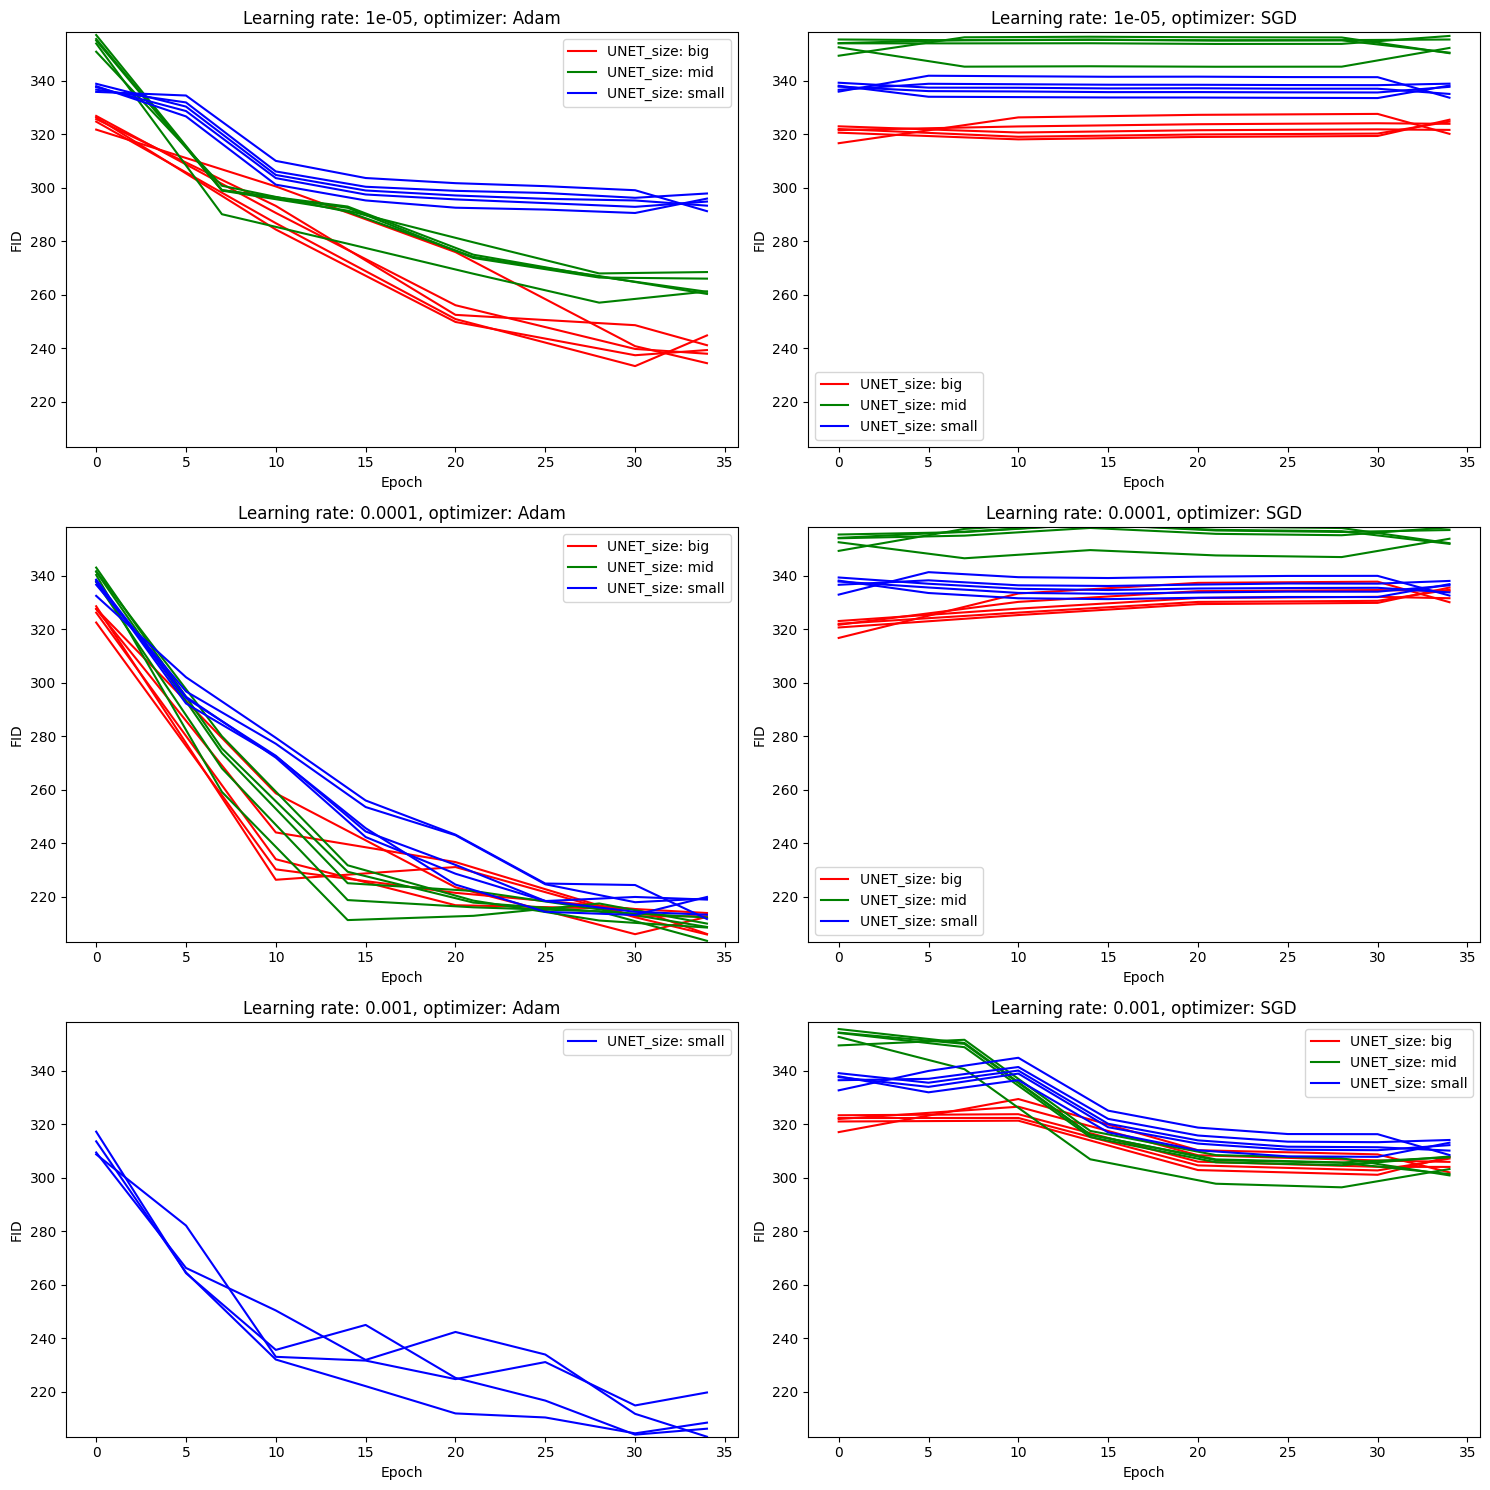

In [91]:
import matplotlib.pyplot as plt

# Define a color map for UNET sizes
color_map = {
    'small': 'blue',
    'mid': 'green',
    'big': 'red'
}

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

min_fid = results['fid_scores'].apply(lambda x: x[-1]).min()
max_fid = results['fid_scores'].apply(lambda x: x[-1]).max()

for i, lr in enumerate(results['LEARNING_RATE'].unique()):
    for j, optimizer in enumerate(results['optimizer'].unique()):
        added_labels = set()  # Track which labels have been added to the legend
        for k, unet_size in enumerate(results['UNET_size'].unique()):
            temp = results[(results['LEARNING_RATE'] == lr) & (results['optimizer'] == optimizer) & (results['UNET_size'] == unet_size)]
            for idx, row in temp.iterrows():
                color = color_map[row['UNET_size']]
                label = f"UNET_size: {row['UNET_size']}"
                if label not in added_labels:
                    ax[i, j].plot(row['fid_scores_epochs'], row['fid_scores'], label=label, color=color)
                    added_labels.add(label)  # Add label to the set
                else:
                    ax[i, j].plot(row['fid_scores_epochs'], row['fid_scores'], color=color)
                ax[i, j].set_title(f"Learning rate: {lr}, optimizer: {optimizer}")
                ax[i, j].set_xlabel('Epoch')
                ax[i, j].set_ylabel('FID')
                ax[i, j].legend()
                ax[i, j].set_ylim(min_fid, max_fid)

plt.tight_layout()
plt.savefig('fid_lr_optimizer_unet_size.png')
plt.show()


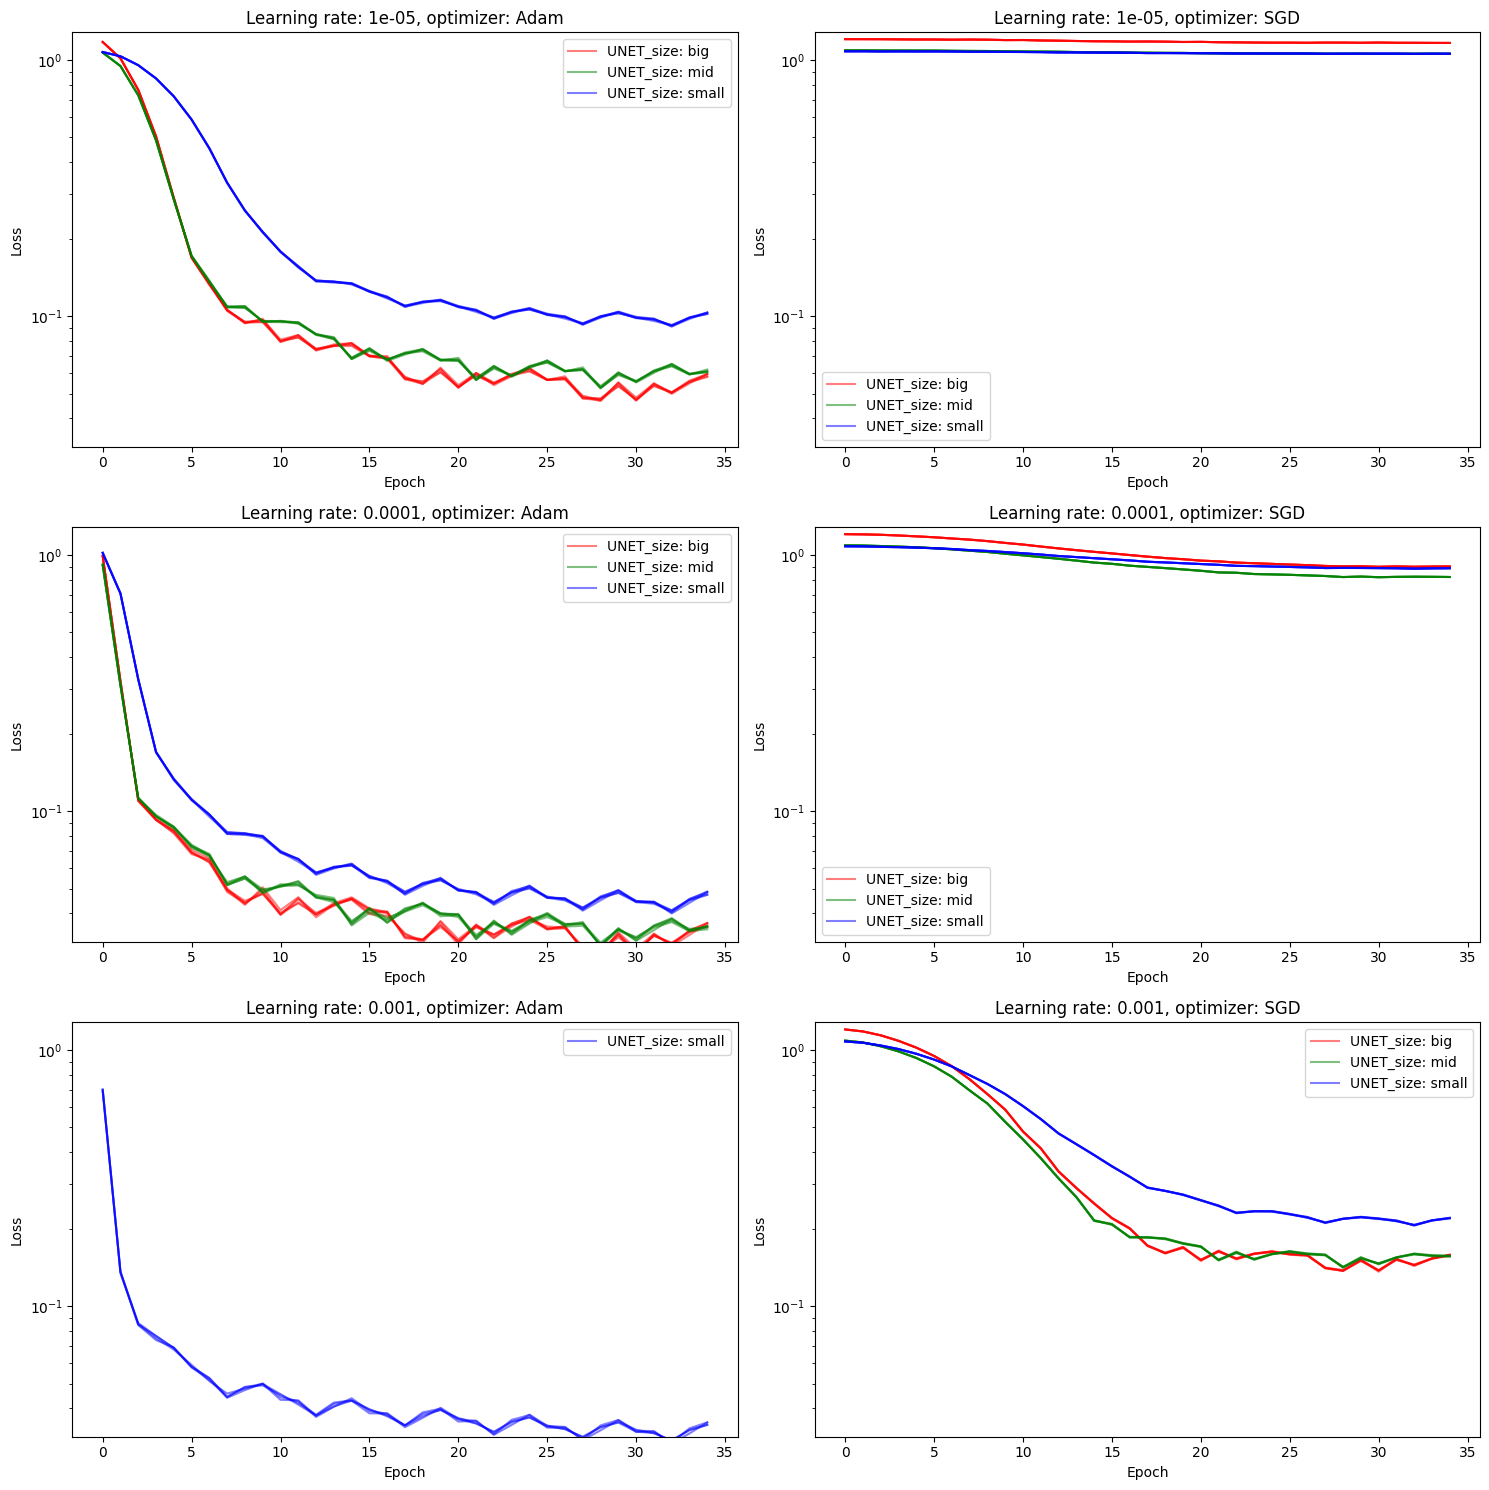

In [94]:
# plot learning rate vs optimizer and unet size
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

max_loss = results['losses'].apply(lambda x: x[-1]).max()
min_loss = results['losses'].apply(lambda x: x[-1]).min()

# pad the losses 10%
max_loss += max_loss * 0.1
min_loss -= min_loss * 0.1

for i, lr in enumerate(results['LEARNING_RATE'].unique()):
    for j, optimizer in enumerate(results['optimizer'].unique()):
        added_labels = set()  # Track which labels have been added to the legend
        for k, unet_size in enumerate(results['UNET_size'].unique()):
            temp = results[(results['LEARNING_RATE'] == lr) & (results['optimizer'] == optimizer) & (results['UNET_size'] == unet_size)]
            for idx, row in temp.iterrows():
                color = color_map[row['UNET_size']]
                label = f"UNET_size: {row['UNET_size']}"
                if label not in added_labels:
                    ax[i, j].plot(row['losses'], label=label, color=color, alpha=0.5)
                    added_labels.add(label)  # Add label to the set
                else:
                    ax[i, j].plot(row['losses'], color=color, alpha=0.5)
                ax[i, j].set_title(f"Learning rate: {lr}, optimizer: {optimizer}")
                ax[i, j].set_xlabel('Epoch')
                ax[i, j].set_ylabel('Loss')
                ax[i, j].legend()
                ax[i, j].set_ylim(min_loss, max_loss)
                # set y scale to log
                ax[i, j].set_yscale('log')
plt.tight_layout()
plt.savefig('loss_lr_optimizer_unet_size.png')
plt.show()
    